In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import folium 

## 1.Load the Data

In [34]:
df=pd.read_csv('IEA Global EV Data 2024.csv')

## 2.Explore the Data

In [35]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [37]:
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


# 3. Analyze the Data


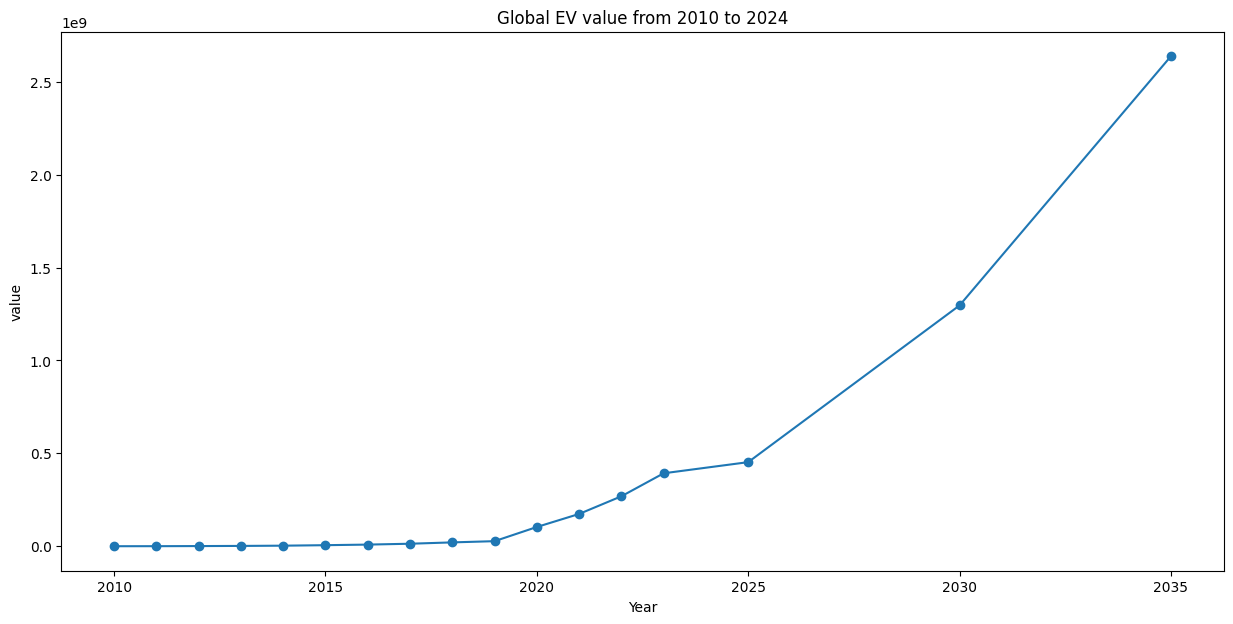

In [38]:
sales_of_yeear=df.groupby('year')['value'].sum().reset_index()
plt.figure(figsize=(15,7))
plt.plot(sales_of_yeear['year'],sales_of_yeear['value'],marker='o')
plt.title('Global EV value from 2010 to 2024')
plt.xlabel('Year')
plt.ylabel('value')
plt.show()

In [39]:
unit=df['unit'].unique().sum()

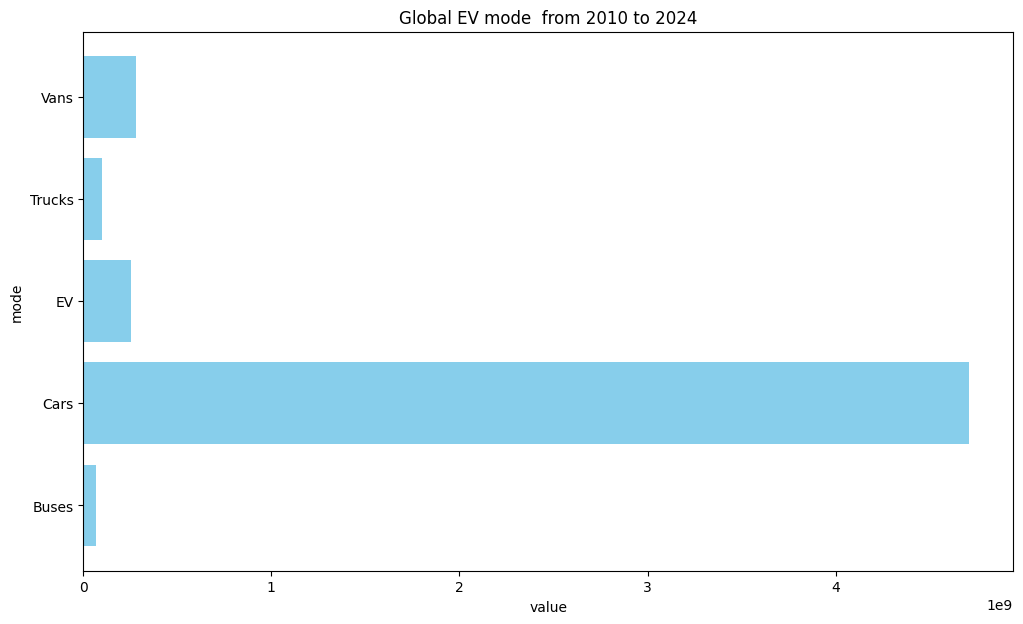

In [40]:
sales_of_region = df.groupby('mode')['value'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 7))
plt.barh(sales_of_region['mode'], sales_of_region['value'], color='skyblue')
plt.title('Global EV mode  from 2010 to 2024')
plt.xlabel('value')
plt.ylabel('mode')
plt.show()

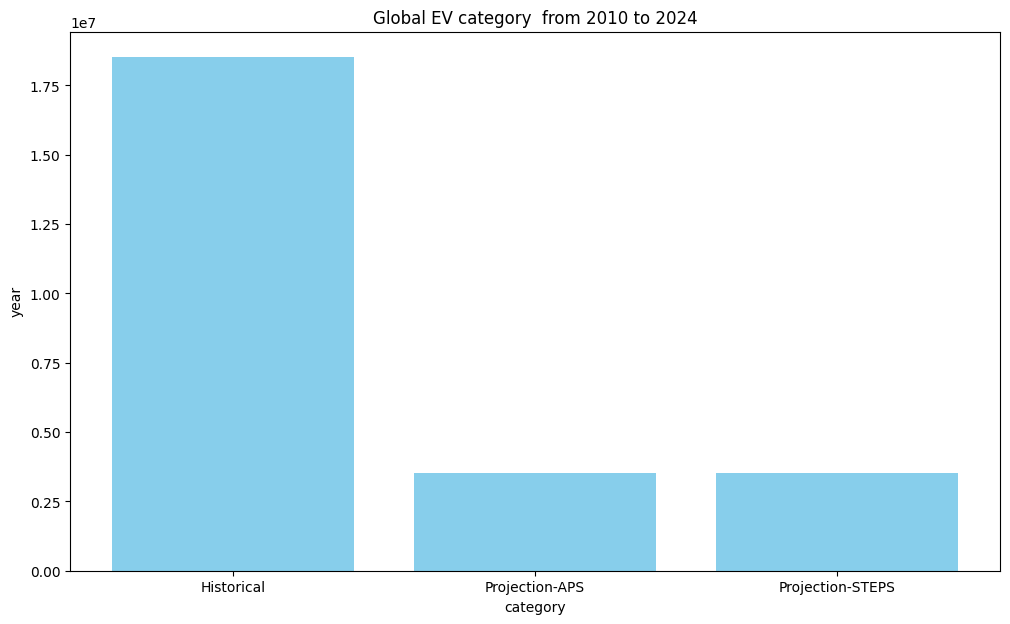

In [41]:
sales_of_region = df.groupby('category')['year'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 7))
plt.bar(sales_of_region['category'], sales_of_region['year'], color='skyblue')
plt.title('Global EV category  from 2010 to 2024')
plt.xlabel('category')
plt.ylabel('year')
plt.show()

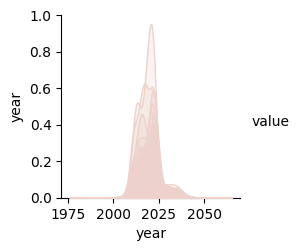

In [42]:
sns.pairplot(df, dropna = True, hue = 'value',kind = 'kde')

## Linear Regression

In [52]:
value_by_year = df.groupby('year')['value'].sum().reset_index()

# Define features and target
X = value_by_year['year'].values.reshape(-1, 1)  # Features (years)
y = value_by_year['value'].values  # Target (sales)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predict future years (e.g., 2025 to 2030)
future_years = np.array([[2025], [2026], [2027], [2028], [2029], [2030]])
predictions = model.predict(future_years)

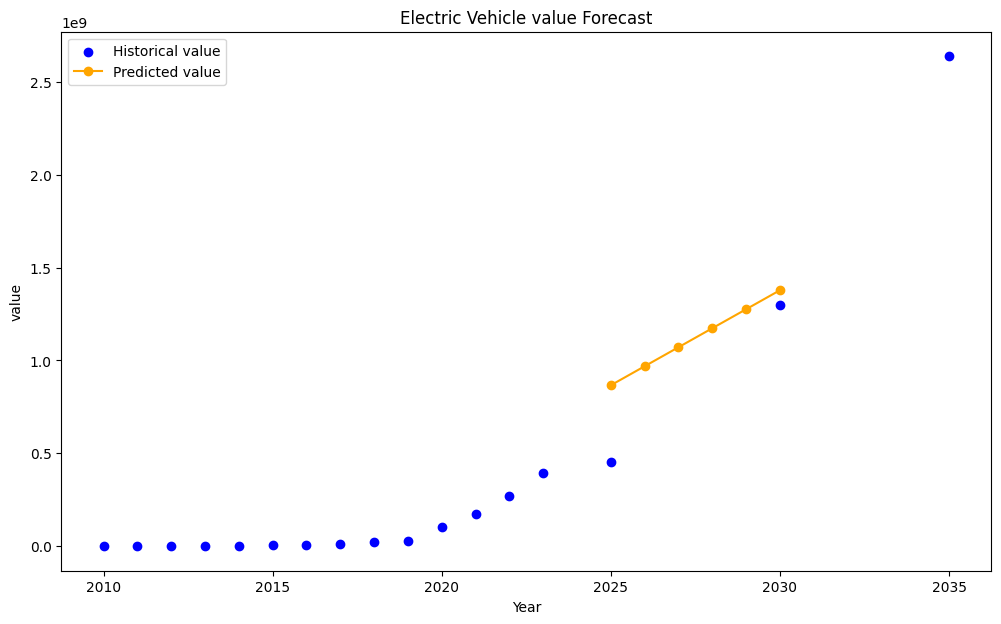

In [51]:
# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(sales_by_year['year'], sales_by_year['value'], color='blue', label='Historical value')
plt.plot(future_years, predictions, color='orange', label='Predicted value', marker='o')
plt.title('Electric Vehicle value Forecast')
plt.xlabel('Year')
plt.ylabel('value')
plt.legend()
plt.show()

# ARIMA Model

In [54]:
from statsmodels.tsa.arima.model import ARIMA
value_by_year= df.groupby('year')['value'].sum()
# Fit ARIMA model
model = ARIMA(value_by_year, order=(1, 1, 1))  # Adjust the order based on ACF/PACF plots
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=6)  #

c:\Users\MADRID\OneDrive\Desktop\project\Global EV Sales 2010-2024\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MADRID\OneDrive\Desktop\project\Global EV Sales 2010-2024\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MADRID\OneDrive\Desktop\project\Global EV Sales 2010-2024\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MADRID\OneDrive\Desktop\project\Global EV Sales 2010-2024\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

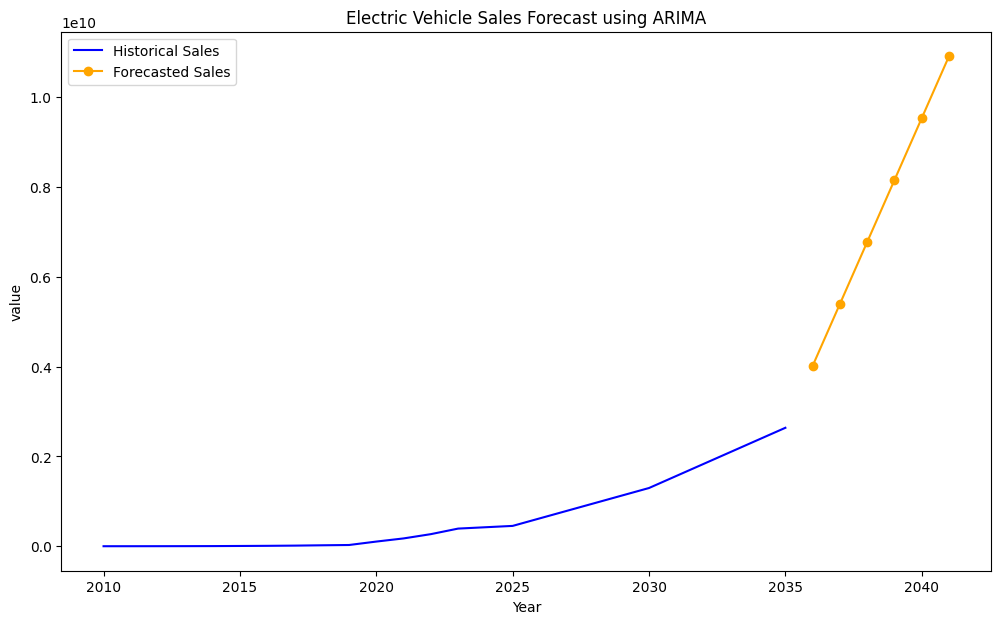

In [56]:

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(value_by_year.index, value_by_year, label='Historical Sales', color='blue')
plt.plot(range(value_by_year.index[-1] + 1, value_by_year.index[-1] + 7), forecast, label='Forecasted Sales', color='orange', marker='o')
plt.title('Electric Vehicle value Forecast using ARIMA')
plt.xlabel('Year')
plt.ylabel('value')
plt.legend()
plt.show()